<a href="https://colab.research.google.com/github/mernaadell/Computer-Vision/blob/master/Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math

In [3]:
from google.colab import files
uploaded = files.upload()

Saving merna.jpg to merna.jpg


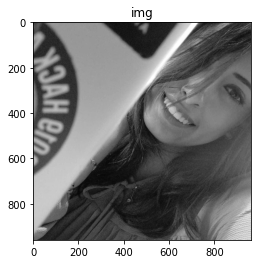

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read image
img = cv2.imread("merna.jpg", 0)
plt.imshow(img, cmap='gray')
plt.title("img")
plt.show()

[-2. -1.  0.  1.  2.]

after outer 
  [[0.01463746 0.02129738 0.02413309 0.02129738 0.01463746]
 [0.02129738 0.0309875  0.03511344 0.0309875  0.02129738]
 [0.02413309 0.03511344 0.03978874 0.03511344 0.02413309]
 [0.02129738 0.0309875  0.03511344 0.0309875  0.02129738]
 [0.01463746 0.02129738 0.02413309 0.02129738 0.01463746]]



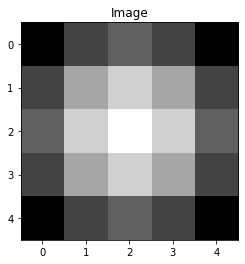

gaussian_kernel 2D 
 [[0.36787944 0.53526143 0.60653066 0.53526143 0.36787944]
 [0.53526143 0.77880078 0.8824969  0.77880078 0.53526143]
 [0.60653066 0.8824969  1.         0.8824969  0.60653066]
 [0.53526143 0.77880078 0.8824969  0.77880078 0.53526143]
 [0.36787944 0.53526143 0.60653066 0.53526143 0.36787944]]


In [5]:
def gaussian_kernel(size, sigma=1):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    print(kernel_1D)
    for i in range(size):
        kernel_1D[i] = 1 / (np.sqrt(2 * np.pi) * sigma) * np.e ** (-np.power((kernel_1D[i] -  0) / sigma, 2) / 2) 
    #Thus the 2-D convolution can be performed by first convolving with a 1-D Gaussian in the x direction, and then convolving with another 1-D Gaussian in the y direction
    
    print()
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    print("after outer \n ",kernel_2D)
    print()
    kernel_2D *= 1.0 / kernel_2D.max()
  #kda m l 1D gabt 2D
    
    plt.imshow(kernel_2D,cmap='gray')
    plt.title("Image")
    plt.show()
 
    return kernel_2D
print("gaussian_kernel 2D \n",gaussian_kernel(5,2))

In [0]:
def convolution(image, kernel,average=False):
    
    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

 
    plt.imshow(padded_image, cmap='gray')
    plt.title("Padded Image")
    plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))


    plt.imshow(output, cmap='gray')
    plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
    plt.show()

    return output
 

In [0]:
def gaussian_blur(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=1)
    return convolution(image, kernel, average=True)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]

after outer 
  [[1.79105293e-08 5.93115274e-07 7.22562324e-06 3.23829967e-05
  5.33905355e-05 3.23829967e-05 7.22562324e-06 5.93115274e-07
  1.79105293e-08]
 [5.93115274e-07 1.96412803e-05 2.39279779e-04 1.07237757e-03
  1.76805171e-03 1.07237757e-03 2.39279779e-04 1.96412803e-05
  5.93115274e-07]
 [7.22562324e-06 2.39279779e-04 2.91502447e-03 1.30642333e-02
  2.15392793e-02 1.30642333e-02 2.91502447e-03 2.39279779e-04
  7.22562324e-06]
 [3.23829967e-05 1.07237757e-03 1.30642333e-02 5.85498315e-02
  9.65323526e-02 5.85498315e-02 1.30642333e-02 1.07237757e-03
  3.23829967e-05]
 [5.33905355e-05 1.76805171e-03 2.15392793e-02 9.65323526e-02
  1.59154943e-01 9.65323526e-02 2.15392793e-02 1.76805171e-03
  5.33905355e-05]
 [3.23829967e-05 1.07237757e-03 1.30642333e-02 5.85498315e-02
  9.65323526e-02 5.85498315e-02 1.30642333e-02 1.07237757e-03
  3.23829967e-05]
 [7.22562324e-06 2.39279779e-04 2.91502447e-03 1.30642333e-02
  2.15392793e-02 1.30642333e-02 

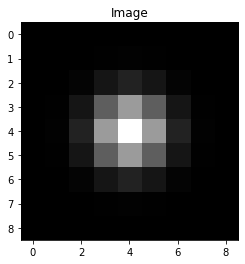

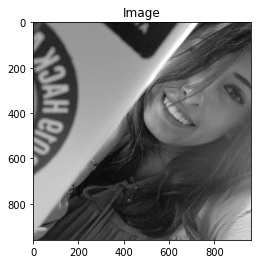

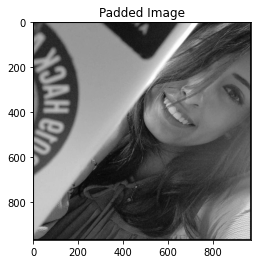

Output Image size : (960, 960)


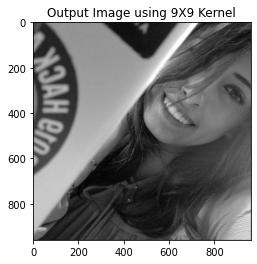

In [14]:
img2=gaussian_blur(img,9)

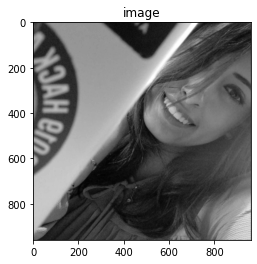

In [15]:
plt.imshow(img2, cmap='gray')
plt.title("image")
plt.show()

In [0]:
def sobel_edge_detection(image, filter):
    new_image_x = convolution(image, filter)

 
    plt.imshow(new_image_x, cmap='gray')
    plt.title("Horizontal Edge")
    plt.show()

    new_image_y = convolution(image, np.flip(filter.T, axis=0))

 
    plt.imshow(new_image_y, cmap='gray')
    plt.title("Vertical Edge")
    plt.show()

    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Gradient Magnitude")
    plt.show()

    gradient_direction = np.arctan2(new_image_y, new_image_x)

  
    gradient_direction = np.rad2deg(gradient_direction)
    gradient_direction += 180

    return gradient_magnitude, gradient_direction

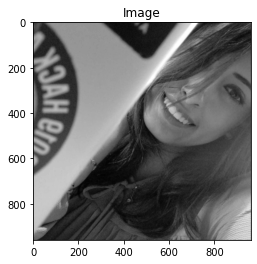

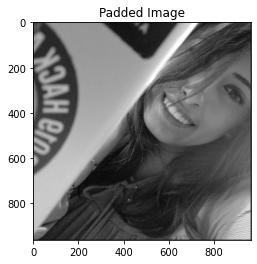

Output Image size : (960, 960)


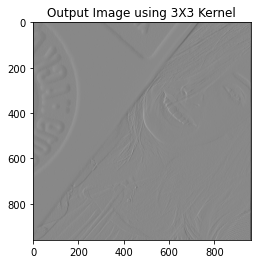

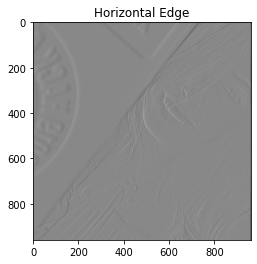

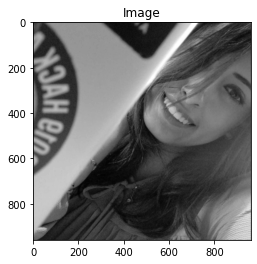

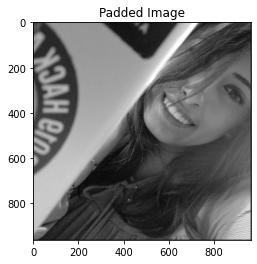

Output Image size : (960, 960)


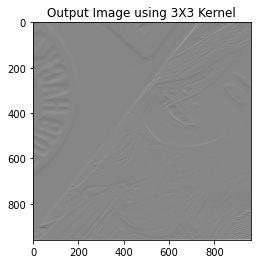

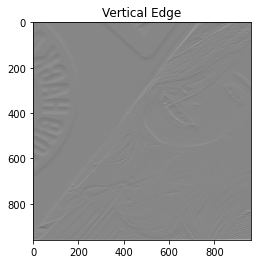

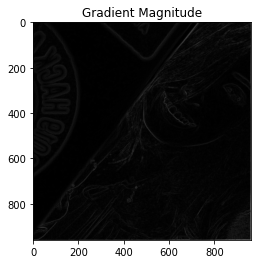

(array([[ 42.22465521,  48.693429  ,  52.84181636, ...,  66.67208718,
          64.8855279 ,  59.00630204],
        [ 48.83762417,  24.94801038,  16.82443943, ...,  40.3887516 ,
          40.63152696,  71.38455508],
        [ 53.37991529,  16.90096979,   4.40597307, ...,  27.7126008 ,
          30.24170843,  84.80144996],
        ...,
        [109.85811741,  31.93867751,   6.31265395, ...,   9.93962763,
          63.48141164, 209.2645352 ],
        [102.56266658,  42.10365013,  33.5848638 , ...,  57.68032986,
          79.32041348, 199.89868036],
        [ 93.57277657, 102.19790455, 108.79942183, ..., 215.1975327 ,
         201.57332278, 184.31721928]]),
 array([[135.10182762, 105.71932413,  94.25853845, ...,  91.89442535,
          83.55828758,  48.35002784],
        [164.18746971, 134.79438584, 103.75431268, ...,  95.78768845,
          71.35043776,  21.22284283],
        [174.56684518, 161.77930565, 124.62096531, ...,  98.59551709,
          54.76792381,  11.02146926],
        ...,


In [17]:
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
sobel_edge_detection(img2, filter)

In [0]:
def non_max_suppression(gradient_magnitude, gradient_direction):
    image_row, image_col = gradient_magnitude.shape

    output = np.zeros(gradient_magnitude.shape)

    PI = 180

    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            direction = gradient_direction[row, col]
          # check all directions
            # (0 - PI/8 and 15PI/8 - 2PI)
            if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
                before_pixel = gradient_magnitude[row, col - 1]
                after_pixel = gradient_magnitude[row, col + 1]

            elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
                before_pixel = gradient_magnitude[row + 1, col - 1]
                after_pixel = gradient_magnitude[row - 1, col + 1]

            elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
                before_pixel = gradient_magnitude[row - 1, col]
                after_pixel = gradient_magnitude[row + 1, col]

            else:
                before_pixel = gradient_magnitude[row - 1, col - 1]
                after_pixel = gradient_magnitude[row + 1, col + 1]

            if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
                output[row, col] = gradient_magnitude[row, col]

 
    plt.imshow(output, cmap='gray')
    plt.title("Non Max Suppression")
    plt.show()

    return output




In [0]:
def threshold(image, low, high, weak):
    output = np.zeros(image.shape)

    strong = 255

    strong_row, strong_col = np.where(image >= high)
    weak_row, weak_col = np.where((image <= high) & (image >= low))

    output[strong_row, strong_col] = strong
    output[weak_row, weak_col] = weak


    plt.imshow(output, cmap='gray')
    plt.title("threshold")
    plt.show()

    return output


In [0]:
def hysteresis(image, weak):
    image_row, image_col = image.shape

    top_to_bottom = image.copy()

    for row in range(1, image_row):
        for col in range(1, image_col):
            if top_to_bottom[row, col] == weak:
                if top_to_bottom[row, col + 1] == 255 or top_to_bottom[row, col - 1] == 255 or top_to_bottom[row - 1, col] == 255 or top_to_bottom[
                    row + 1, col] == 255 or top_to_bottom[
                    row - 1, col - 1] == 255 or top_to_bottom[row + 1, col - 1] == 255 or top_to_bottom[row - 1, col + 1] == 255 or top_to_bottom[
                    row + 1, col + 1] == 255:
                    top_to_bottom[row, col] = 255
                else:
                    top_to_bottom[row, col] = 0

    bottom_to_top = image.copy()

    for row in range(image_row - 1, 0, -1):
        for col in range(image_col - 1, 0, -1):
            if bottom_to_top[row, col] == weak:
                if bottom_to_top[row, col + 1] == 255 or bottom_to_top[row, col - 1] == 255 or bottom_to_top[row - 1, col] == 255 or bottom_to_top[
                    row + 1, col] == 255 or bottom_to_top[
                    row - 1, col - 1] == 255 or bottom_to_top[row + 1, col - 1] == 255 or bottom_to_top[row - 1, col + 1] == 255 or bottom_to_top[
                    row + 1, col + 1] == 255:
                    bottom_to_top[row, col] = 255
                else:
                    bottom_to_top[row, col] = 0

    right_to_left = image.copy()

    for row in range(1, image_row):
        for col in range(image_col - 1, 0, -1):
            if right_to_left[row, col] == weak:
                if right_to_left[row, col + 1] == 255 or right_to_left[row, col - 1] == 255 or right_to_left[row - 1, col] == 255 or right_to_left[
                    row + 1, col] == 255 or right_to_left[
                    row - 1, col - 1] == 255 or right_to_left[row + 1, col - 1] == 255 or right_to_left[row - 1, col + 1] == 255 or right_to_left[
                    row + 1, col + 1] == 255:
                    right_to_left[row, col] = 255
                else:
                    right_to_left[row, col] = 0

    left_to_right = image.copy()

    for row in range(image_row - 1, 0, -1):
        for col in range(1, image_col):
            if left_to_right[row, col] == weak:
                if left_to_right[row, col + 1] == 255 or left_to_right[row, col - 1] == 255 or left_to_right[row - 1, col] == 255 or left_to_right[
                    row + 1, col] == 255 or left_to_right[
                    row - 1, col - 1] == 255 or left_to_right[row + 1, col - 1] == 255 or left_to_right[row - 1, col + 1] == 255 or left_to_right[
                    row + 1, col + 1] == 255:
                    left_to_right[row, col] = 255
                else:
                    left_to_right[row, col] = 0

    final_image = top_to_bottom + bottom_to_top + right_to_left + left_to_right

    final_image[final_image > 255] = 255

    return final_image

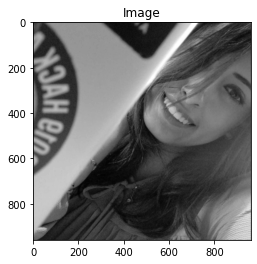

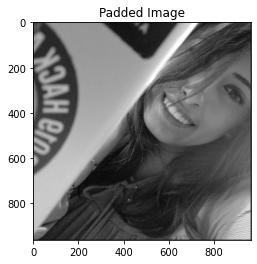

Output Image size : (960, 960)


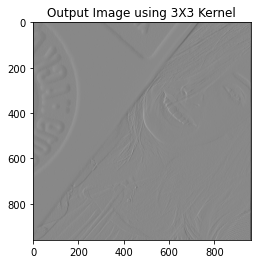

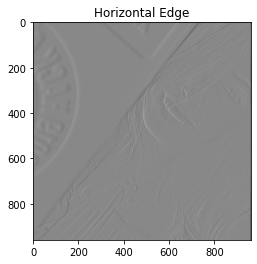

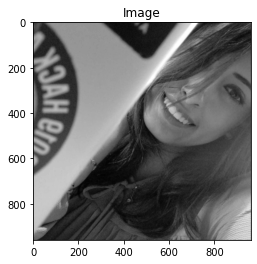

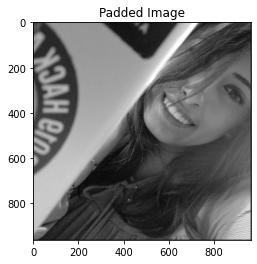

Output Image size : (960, 960)


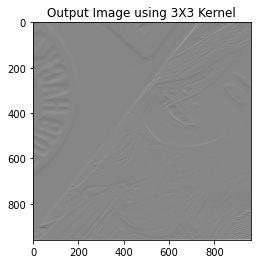

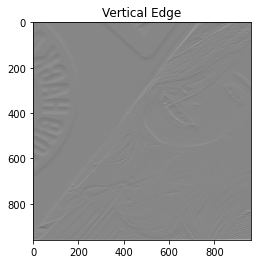

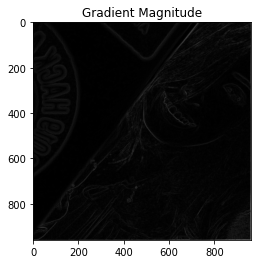

In [22]:

filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
gradient_magnitude, gradient_direction = sobel_edge_detection(img2, filter)

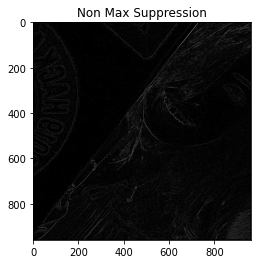

In [23]:
 new_image = non_max_suppression(gradient_magnitude, gradient_direction)

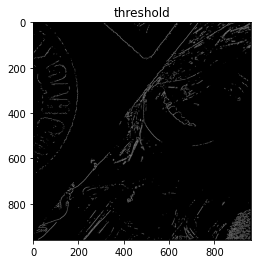

In [25]:


new_image = threshold(new_image, 5, 60, 30)




In [0]:
new_image = hysteresis(new_image, 60)
plt.imshow(new_image, cmap='gray')
plt.title("hysteresis")
plt.show()